<a href="https://colab.research.google.com/github/sricharithanarra/Named-Entity-Recognition-for-Medical-Text/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DISEASE PREDICTION

IMPORT LIBRARIES

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [7]:
train_df = pd.read_csv('/content/drive/MyDrive/Training.csv')

# Drop the "Unnamed: 133" column if it exists
if "Unnamed: 133" in train_df.columns:
    train_df = train_df.drop(columns=["Unnamed: 133"])

In [8]:
test_df = pd.read_csv('Testing.csv')

In [9]:
label_encoder = preprocessing.LabelEncoder()# label encoder

DATASET CHECKING

In [10]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [11]:
train_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [12]:
test_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

SPLITTING DATESET

In [13]:
# Separate features (X_train) and target variable (y_train)
X_train = train_df.drop(columns=train_df.columns[-1])
y_train = train_df[train_df.columns[-1]]

In [14]:
# Separate features (X_test) and target variable (y_test)
X_test = test_df.drop(columns=test_df.columns[-1])
y_test = test_df[test_df.columns[-1]]

In [15]:

# Fit the label encoder on the training data
label_encoder.fit(y_train)

# Transform both training and testing data
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

## MODEL - RANDOM FOREST

In [16]:
# Initialize the RandomForestClassifier with a random_state of 42
rfc = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy or use a different metric
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.62%


In [18]:
# Create a dictionary that maps integer labels to string labels based on your label encoder
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}

# Transform integer labels back to string labels for both y_pred and y_test
y_pred_labels = [label_mapping[label] for label in y_pred]
y_test_labels = [label_mapping[label] for label in y_test]

accuracy (train) of RF classifier:1.0
Acuuracy (test) of RF classifier:0.9761904761904762


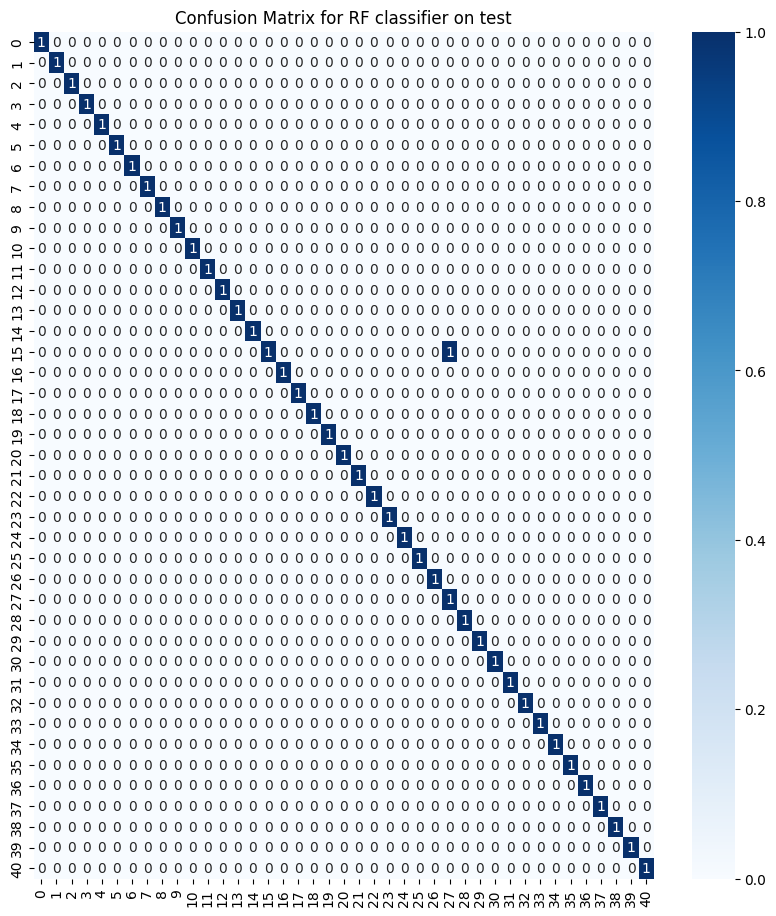

In [19]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"accuracy (train) of RF classifier:{accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Acuuracy (test) of RF classifier:{accuracy_score(y_test, y_pred)}")
plt.figure(figsize=(10, 11))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for RF classifier on test")
plt.show()

### Classification Report

In [20]:

# Generate the classification report
report = classification_report(y_test_labels, y_pred_labels)

# Print the report or use it as needed
print(report)



                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

### Prediction

In [ ]:
pip install tabulate


In [21]:
from tabulate import tabulate

# Create a DataFrame with "prognosis" and "predicted" columns
comparison_df = pd.DataFrame({'prognosis': y_test_labels, 'predicted': y_pred_labels})

# Print the comparison DataFrame as a table
print(tabulate(comparison_df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════════════════════════╤═════════════════════════════════════════╕
│    │ prognosis                               │ predicted                               │
╞════╪═════════════════════════════════════════╪═════════════════════════════════════════╡
│  0 │ Fungal infection                        │ Fungal infection                        │
├────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│  1 │ Allergy                                 │ Allergy                                 │
├────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│  2 │ GERD                                    │ GERD                                    │
├────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│  3 │ Chronic cholestasis                     │ Chronic cholestasis                     │
├────┼─────────────────────────────────────────┼─────────────────────────────────────────┤

In [22]:
probs = rfc.predict_proba(X_test)#probability predictions
top3= np.argsort(-probs, axis=1)[:, :3]#top 3 predictions for each row
top3_labels = [label_encoder.inverse_transform(indices) for indices in top3]# Map the indices to class labels
print(top3_labels)


[array(['Fungal infection', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypertension '], dtype=object), array(['Allergy', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypertension '], dtype=object), array(['GERD', '(vertigo) Paroymsal  Positional Vertigo', 'Hypertension '],
      dtype=object), array(['Chronic cholestasis', 'Hypertension ', 'Hyperthyroidism'],
      dtype=object), array(['Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypertension '], dtype=object), array(['Peptic ulcer diseae', '(vertigo) Paroymsal  Positional Vertigo',
       'Hepatitis E'], dtype=object), array(['AIDS', '(vertigo) Paroymsal  Positional Vertigo', 'Hypertension '],
      dtype=object), array(['Diabetes ', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypertension '], dtype=object), array(['Gastroenteritis', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypertension '], dtype=object), array(['Bronchial Asthma', '(vertigo) Paroymsal  Positional Vertigo',
      

In [23]:
top3_probs = []
# Loop through each instance
for i in range(len(top3)):
    # Get the top 3 indices for current instance
    indices = top3[i]

    # Get the top 3 labels
    labels = label_encoder.inverse_transform(indices)

    # Get the probabilities of the top 3 labels
    probabilities = probs[i, indices]

    # Combine labels and their probabilities, and append to the list
    labels_with_probs = list(zip(labels, probabilities))
    top3_probs.append(labels_with_probs)

# Print the result
for i, labels_with_probs in enumerate(top3_probs):
    print(f"Instance {i+1}: {y_test_labels[i]}")
    for label, prob in labels_with_probs:
        print(f"   {label}: {prob*100:.4f}%")
    print("\n")

Instance 1: Fungal infection
   Fungal infection: 100.0000%
   (vertigo) Paroymsal  Positional Vertigo: 0.0000%
   Hypertension : 0.0000%


Instance 2: Allergy
   Allergy: 100.0000%
   (vertigo) Paroymsal  Positional Vertigo: 0.0000%
   Hypertension : 0.0000%


Instance 3: GERD
   GERD: 100.0000%
   (vertigo) Paroymsal  Positional Vertigo: 0.0000%
   Hypertension : 0.0000%


Instance 4: Chronic cholestasis
   Chronic cholestasis: 100.0000%
   Hypertension : 0.0000%
   Hyperthyroidism: 0.0000%


Instance 5: Drug Reaction
   Drug Reaction: 100.0000%
   (vertigo) Paroymsal  Positional Vertigo: 0.0000%
   Hypertension : 0.0000%


Instance 6: Peptic ulcer diseae
   Peptic ulcer diseae: 100.0000%
   (vertigo) Paroymsal  Positional Vertigo: 0.0000%
   Hepatitis E: 0.0000%


Instance 7: AIDS
   AIDS: 100.0000%
   (vertigo) Paroymsal  Positional Vertigo: 0.0000%
   Hypertension : 0.0000%


Instance 8: Diabetes 
   Diabetes : 100.0000%
   (vertigo) Paroymsal  Positional Vertigo: 0.0000%
   Hyper